In [ ]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Importing models from Sickit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Importing metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Importing additional tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [ ]:
df = pd.read_csv("/content/idp-dta set 1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.shape

(2772, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# are there any duplicated rows?
df.duplicated().sum()

1435

In [ ]:
#are there any null values?
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<ipython-input-35-3a2ac5cdeef0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new
<ipython-input-35-3a2ac5cdeef0>:7: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like

Text(0, 0.5, 'Count')

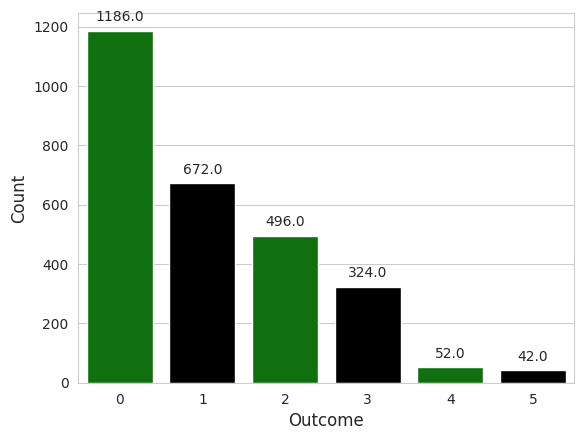

In [ ]:
# create countplot
sns.set_style('whitegrid')

# Ensure df is defined and contains the 'Outcome' column
# df = pd.read_csv('your_data.csv') # Example: Read data from a CSV file - replace 'your_data.csv'

ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Count',fontsize=12)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# 1. Load the dataset (example: replace 'your_data.csv' with your actual file)
df = pd.read_csv('/content/idp-dta set 1.csv')

# 2. Handle missing values
# Separate features (X) and target variable (y)
X = df.drop('smoker', axis=1)  # Drop the target column (assuming it's named 'Outcome')
y = df['children']  # Target column

# Check for missing values in the dataset
print(X.isnull().sum())

# Impute missing numerical values with mean
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute missing categorical values with the most frequent category
cat_cols = X.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# 3. Encoding categorical variables
# Label Encoding for the target variable (y) if it's categorical
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# One-Hot Encoding for categorical features
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

X = np.array(ct.fit_transform(X))  # Convert to NumPy array

# 4. Feature scaling (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Optional: Feature Selection using correlation or statistical methods (example: variance threshold)
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.1)
# X_train = selector.fit_transform(X_train)
# X_test = selector.transform(X_test)

# Now, X_train and y_train are ready for training a model
# X_test and y_test are used for model evaluation


age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_regression for regression tasks

# Optional: To visualize missing data
import missingno as msno

# Libraries for saving preprocessing objects
import joblib


In [ ]:
# 1. Load the Dataset
# Replace the file path with your actual file path
df = pd.read_csv('/content/idp-dta set 1.csv')

# Display the first few rows to verify loading
print("Dataset Loaded Successfully. First 5 rows:")
print(df.head())


Dataset Loaded Successfully. First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# 3. Handle Missing Values and Define Features and Target
# Separate features and target
if target_variable not in df.columns:
    raise ValueError(f"The dataset must contain a '{target_variable}' column as the target variable.")

X = df.drop(target_variable, axis=1)
y = df[target_variable]

print("\nFeatures and Target Defined:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")



Features and Target Defined:
Features shape: (2772, 6)
Target shape: (2772,)


In [ ]:
# 4. Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")



Numerical Columns (3): ['age', 'children', 'charges']
Categorical Columns (3): ['sex', 'smoker', 'region']


In [ ]:
# 7. Feature Extraction and Selection
# Example: PCA for Dimensionality Reduction and SelectKBest for feature selection
feature_extraction_selection = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Retain 95% of variance
    ('selectkbest', SelectKBest(score_func=f_regression, k=10))  # Select top 10 features for regression
])

print("\nFeature Extraction and Selection Pipeline Defined:")
print(feature_extraction_selection)



Feature Extraction and Selection Pipeline Defined:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'children',
                                                   'charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEn

In [ ]:
# 9. Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nDataset Split:")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")



Dataset Split:
Training Features Shape: (2217, 6)
Testing Features Shape: (555, 6)
Training Target Shape: (2217,)
Testing Target Shape: (555,)



Explained variance ratio by PCA components:
[0.3062115  0.21737922 0.18970979 0.10771501 0.05687322 0.05338365
 0.05243317]


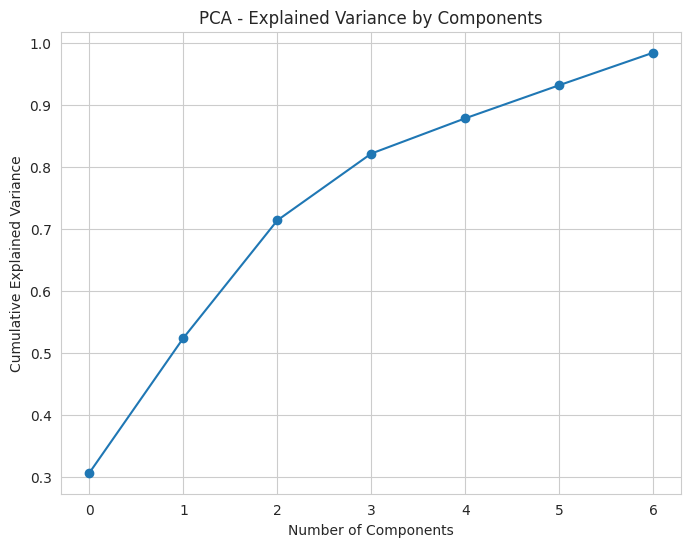

In [ ]:
# 11. Visualize PCA Components (if PCA is used)
if 'pca' in complete_pipeline.named_steps:
    pca = complete_pipeline.named_steps['pca']
    print("\nExplained variance ratio by PCA components:")
    print(pca.explained_variance_ratio_)

    plt.figure(figsize=(8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA - Explained Variance by Components')
    plt.grid(True)
    plt.show()


In [ ]:
# 12. Save Preprocessing Objects (Optional)
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')
print("\nPreprocessor saved as 'preprocessor.pkl'.")

# Save the complete pipeline
joblib.dump(complete_pipeline, 'complete_pipeline.pkl')
print("Complete pipeline saved as 'complete_pipeline.pkl'.")



Preprocessor saved as 'preprocessor.pkl'.
Complete pipeline saved as 'complete_pipeline.pkl'.


In [ ]:
# 13. Example: Training a Machine Learning Model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model = LinearRegression()

# Fit the model on the preprocessed training data
model.fit(X_train_complete, y_train)

# Predict on the test data
y_pred = model.predict(X_test_complete)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 33.2271
Mean Absolute Error (MAE): 4.6061
R-squared (R²): 0.1447


In [ ]:
# 14. Additional Steps (Optional)
# - Hyperparameter Tuning using GridSearchCV or RandomizedSearchCV
# - Cross-Validation
# - Advanced Feature Engineering

# Example: Hyperparameter Tuning with Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky']
}

# Initialize Ridge Regression
ridge = Ridge(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
print("\nStarting GridSearchCV for Ridge Regression...")
grid_search.fit(X_train_complete, y_train)

# Best Parameters and Model
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
best_ridge_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_ridge_model.predict(X_test_complete)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\nBest Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"R-squared (R²): {r2_best:.4f}")



Starting GridSearchCV for Ridge Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from GridSearchCV: {'alpha': 10.0, 'solver': 'auto'}

Best Model Evaluation Metrics:
Mean Squared Error (MSE): 33.2480
Mean Absolute Error (MAE): 4.6071
R-squared (R²): 0.1442
